The dataset is available from the UCI  https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
# Load the data
wine = pd.read_csv('datasets_4458_8204_winequality-red.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Exploratory Data Analysis

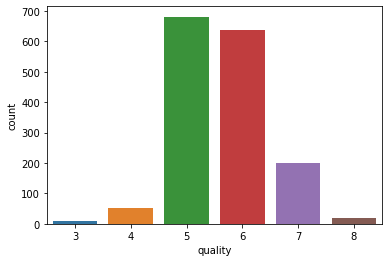

In [3]:
sns.countplot(x='quality',data=wine)

In [7]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [8]:
# Relable the quality
lable = []
for i in wine['quality']:
    if i <= 4:
        lable.append('0')
    elif i > 4 and i <= 6:
        lable.append('1')
    elif i > 6 and i <= 8:
        lable.append('2')
wine['quality_lable'] = lable

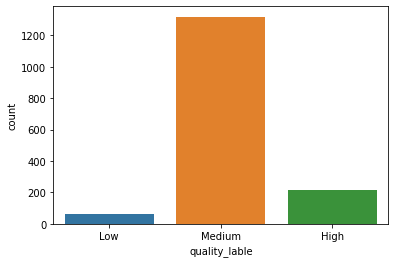

In [9]:
f,ax = plt.subplots()
x = ['Low', 'Medium', 'High']
sns.countplot(x='quality_lable',data=wine)
ax.set_xticklabels(x)
plt.show()

In [10]:
wine.quality_lable.value_counts().sort_index()

0      63
1    1319
2     217
Name: quality_lable, dtype: int64

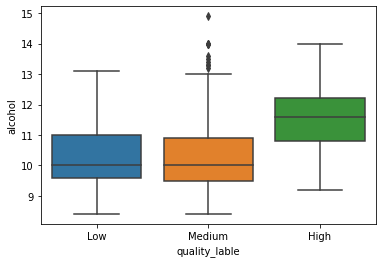

In [12]:
f,ax = plt.subplots()
x = ['Low', 'Medium', 'High']
sns.boxplot(x='quality_lable',y='alcohol',data=wine)
ax.set_xticklabels(x)
plt.show()

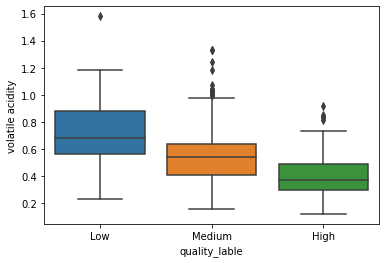

In [13]:
f,ax = plt.subplots()
x = ['Low', 'Medium', 'High']
sns.boxplot(x='quality_lable',y='volatile acidity',data=wine)
ax.set_xticklabels(x) 
plt.show()

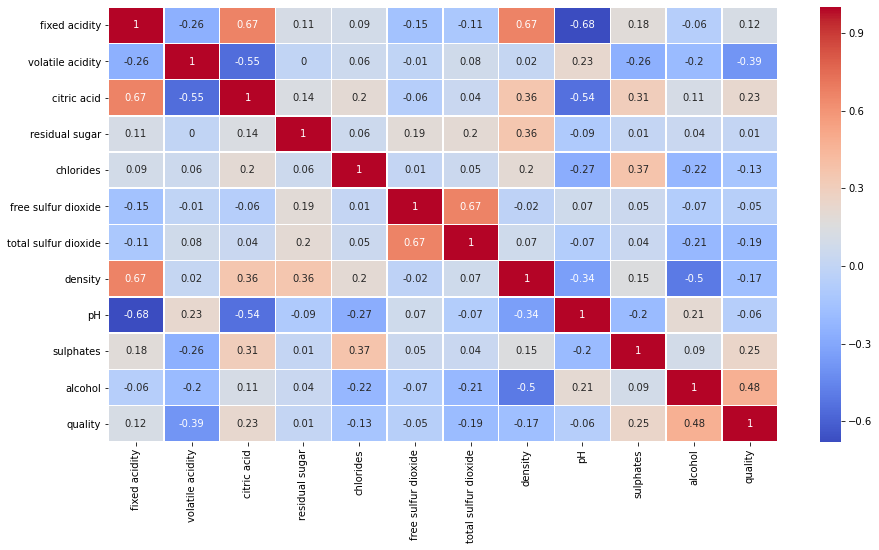

In [11]:
plt.figure(figsize=(15,8))
corr = wine.corr()
sns.heatmap(round(corr,2), annot=True, linewidths=0.5, cmap='coolwarm')

## Data Processing : Feature Scaling

In [14]:
wine = wine.drop('quality',axis=1)
target = wine['quality_lable']

In [15]:
# Scale data
scaled = StandardScaler()
scaled.fit(wine.drop('quality_lable',axis=1))
scaled_features = scaled.transform(wine.drop('quality_lable',axis=1))

In [16]:
wine = pd.DataFrame(scaled_features,columns=wine.columns[:-1,])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


## Model Creation and Evaluation

In [17]:
# Build the training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(wine, target, test_size=0.3, random_state=0)
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1109,1.425044,-0.323013,0.816598,-0.311323,1.775397,1.063900,0.593954,0.770280,-0.914312,0.601055,0.353895
1032,-0.126188,1.632254,-1.391472,1.107633,0.160114,-1.039977,-0.987312,0.950485,0.316751,-0.756246,-0.772512
1002,0.448342,-1.328579,0.303093,-0.346797,-0.520005,-0.274931,-0.591995,-0.840962,-0.331177,1.073160,1.198701
487,1.080326,0.654620,0.457144,-0.524166,-0.732542,-1.039977,-0.987312,0.770280,-0.914312,-1.405390,-0.397043
979,2.229387,-0.434742,1.124700,-0.807957,-0.264960,-1.231239,-1.230584,0.081262,-1.173483,-0.166115,-0.021574
...,...,...,...,...,...,...,...,...,...,...,...
801,0.161077,0.123905,-0.929318,0.540051,-0.413736,-0.753085,-0.896085,0.319768,-0.525555,-1.287363,-0.397043
61,-0.356000,0.906012,1.124700,-0.524166,0.585188,0.394484,1.992767,0.028261,-0.655141,0.305990,-1.054113
431,-0.298547,0.123905,0.405794,-0.240375,-0.286214,0.490115,0.593954,0.346269,-0.395969,-0.579207,-1.147981
1210,-0.873078,0.682553,-1.288771,-0.311323,-0.201199,-0.753085,-0.956903,-0.936364,0.251958,-0.225128,-0.021574


### Decision Tree

In [18]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred_DT = DT.predict(x_test)

In [19]:
print(confusion_matrix(y_test,pred_DT))
print(classification_report(y_test, pred_DT))

[[  3  13   2]
 [  9 372  31]
 [  0  19  31]]
              precision    recall  f1-score   support

           0       0.25      0.17      0.20        18
           1       0.92      0.90      0.91       412
           2       0.48      0.62      0.54        50

    accuracy                           0.85       480
   macro avg       0.55      0.56      0.55       480
weighted avg       0.85      0.85      0.85       480



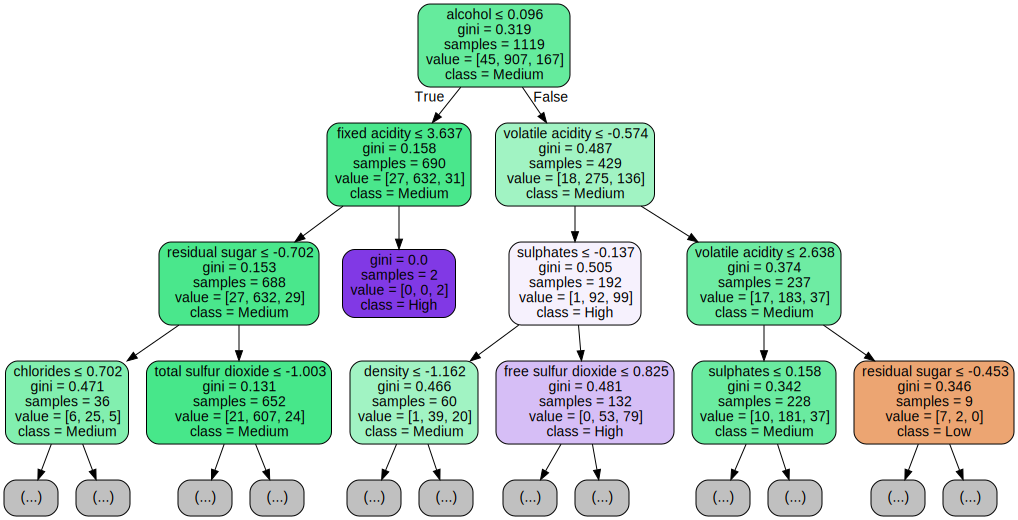

In [40]:
import graphviz
data = tree.export_graphviz(DT,out_file=None,feature_names=list(x_train),class_names=['Low', 'Medium','High'],   
                         filled=True, rounded=True, impurity = True,max_depth=3,
                         special_characters=True)
graph = graphviz.Source(data)
graph

In [38]:
graph.render("DT")

'DT.pdf'

### K-Nearest Neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
# Find the optimum k
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

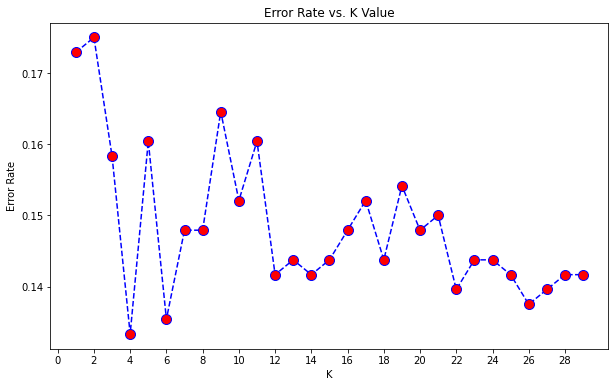

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.xticks(np.arange(0, 30, step=2))
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Because the least error rate of the model is 4, we choose 4 variables as our neighbors.

In [24]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

In [25]:
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test, pred_knn))

[[  1  17   0]
 [  1 393  18]
 [  0  28  22]]
              precision    recall  f1-score   support

           0       0.50      0.06      0.10        18
           1       0.90      0.95      0.92       412
           2       0.55      0.44      0.49        50

    accuracy                           0.87       480
   macro avg       0.65      0.48      0.50       480
weighted avg       0.85      0.87      0.85       480



### Support Vector Machine

In [41]:
from sklearn.svm import SVC
# SVM with default
SVM = SVC()
SVM.fit(x_train, y_train)
pred_SVM = SVM.predict(x_test)

In [42]:
print(confusion_matrix(y_test,pred_SVM))
print(classification_report(y_test, pred_SVM))

[[  0  18   0]
 [  0 400  12]
 [  0  33  17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.89      0.97      0.93       412
           2       0.59      0.34      0.43        50

    accuracy                           0.87       480
   macro avg       0.49      0.44      0.45       480
weighted avg       0.82      0.87      0.84       480



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
# SVM with sigmoid kernel
SVM_sigmoid = SVC(kernel='sigmoid')
SVM_sigmoid.fit(x_train, y_train)
pred_SVM_sigmoid = SVM_sigmoid.predict(x_test)

In [44]:
print(confusion_matrix(y_test,pred_SVM_sigmoid))
print(classification_report(y_test, pred_SVM_sigmoid))

[[  3  13   2]
 [  1 374  37]
 [  2  34  14]]
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        18
           1       0.89      0.91      0.90       412
           2       0.26      0.28      0.27        50

    accuracy                           0.81       480
   macro avg       0.55      0.45      0.47       480
weighted avg       0.81      0.81      0.81       480



The data is significantly imbalanced. We could try to resample the data to see if there are any improvements in the models.

### Oversampling

In [45]:
from imblearn.over_sampling import RandomOverSampler
method = RandomOverSampler(random_state=0)
x_resampled_random, y_resampled_random = method.fit_resample(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [46]:
from collections import  Counter

In [47]:
Counter(y_resampled_random)

Counter({'1': 907, '2': 907, '0': 907})

In [48]:
Counter(y_train)

Counter({'1': 907, '2': 167, '0': 45})

### Decision Tree after Resampling

In [53]:
DT_resample = tree.DecisionTreeClassifier()
DT_resample.fit(x_resampled_random,y_resampled_random)
pred_DT_resample = DT_resample.predict(x_test)

In [54]:
print(confusion_matrix(y_test,pred_DT_resample))
print(classification_report(y_test, pred_DT_resample))

[[  0  17   1]
 [ 12 363  37]
 [  1  22  27]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.90      0.88      0.89       412
           2       0.42      0.54      0.47        50

    accuracy                           0.81       480
   macro avg       0.44      0.47      0.45       480
weighted avg       0.82      0.81      0.81       480



### K-Nearest Neighbors after Resampling

In [55]:
# Find the optimum k
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_resampled_random,y_resampled_random)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

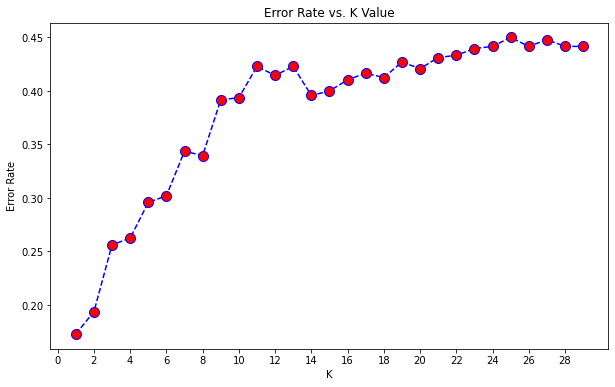

In [56]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.xticks(np.arange(0, 30, step=2))
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [67]:
knn_resample = KNeighborsClassifier(n_neighbors=1)
knn_resample.fit(x_resampled_random,y_resampled_random)
pred_knn_resample = knn_resample.predict(x_test)

In [68]:
print(confusion_matrix(y_test,pred_knn_resample))
print(classification_report(y_test, pred_knn_resample))

[[  2  16   0]
 [  9 358  45]
 [  0  13  37]]
              precision    recall  f1-score   support

           0       0.18      0.11      0.14        18
           1       0.93      0.87      0.90       412
           2       0.45      0.74      0.56        50

    accuracy                           0.83       480
   macro avg       0.52      0.57      0.53       480
weighted avg       0.85      0.83      0.83       480



### Support Vector Machine after Resampling

In [60]:
SVM_resample = SVC()
SVM_resample.fit(x_resampled_random, y_resampled_random)
pred_SVM_resample = SVM.predict(x_test)

In [61]:
print(confusion_matrix(y_test,pred_SVM_resample))
print(classification_report(y_test, pred_SVM_resample))

[[  0  18   0]
 [  0 400  12]
 [  0  33  17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.89      0.97      0.93       412
           2       0.59      0.34      0.43        50

    accuracy                           0.87       480
   macro avg       0.49      0.44      0.45       480
weighted avg       0.82      0.87      0.84       480



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
SVM_resample0 = SVC(kernel='sigmoid')
SVM_resample0.fit(x_resampled_random, y_resampled_random)
pred_SVM_resample0 = SVM.predict(x_test)

In [64]:
print(confusion_matrix(y_test,pred_SVM_resample0))
print(classification_report(y_test, pred_SVM_resample0))

[[  0  18   0]
 [  0 400  12]
 [  0  33  17]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.89      0.97      0.93       412
           2       0.59      0.34      0.43        50

    accuracy                           0.87       480
   macro avg       0.49      0.44      0.45       480
weighted avg       0.82      0.87      0.84       480



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
